# Weather Changes Over Time (Consuming APIs)

## Task
Utilize the following two APIs to evaluate the changes in temperature for your birthday and city you were born in:
* [geocode.xyz](geocode.xyz)
* [open-meteo.com](open-meteo.com)


In [1]:
from datetime import date, datetime, timedelta

import requests
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.ticker import FormatStrFormatter

%matplotlib inline

sns.set_palette('muted')
sns.set_style('white')

## Question 1: Geocoding A Location

> Indented block


Write a function that utilizes the [geocode.xyz](geocode.xyz) API to take in a city and country and return the latitude and longitude of that location

```
def geocode_location(city, country):
    # your code
    return latitude, longitude
```

For example:
```
geocode_location("london", "united kingdom")
```
should return
```
(-0.11534, 51.49742)
```

In [2]:
def geocode_location(city, country):
    base_url = 'https://geocode.xyz'
    endpoint = f"/?locate={city},{country}&json=1"
       
    url = base_url + endpoint
    
    response = requests.get(url)
    data = response.json()
        
        
    if 'latt' in data and 'longt' in data:
        latitude = float(data['latt'])
        longitude = float(data['longt'])
        return latitude, longitude
    else:
        print(f"Error: Unable to retrieve coordinates for {city}, {country}")
        return None 

In [29]:
geocode_location("london", "united kingdom")

(51.51417, -0.11485)

## Question 2: Determining Weather Using Date and Location
Write a function that utilizes the [open-meteo.com](https://open-meteo.com/) API to take in a date and location and return the 15-day average high and low for the following measurements from the years 1960 to 2022:
* `precipitation_sum` (mm): Sum of daily precipitation (including rain, showers and snowfall)
* `temperature_2m_max` (°F): Maximum daily air temperature at 2 meters above ground
* `temperature_2m_min` (°F): Minimum daily air temperature at 2 meters above ground
* `apparent_temperature_max` (°F): Maximum daily apparent temperature
* `apparent_temperature_min` (°F): Min daily apparent temperature

The function should return the above measurements in a dictionary object with the keys being `"precipitation_sum"`, `"temperature_2m_max"`, etc. and the values being the 15-day average of the measurements. The 15-day average should be the 7 days preceeding the input date, the input date, and the 7 days following the input date. This will give the results more statistical validity by increasing the number of samples for each measurement.

The `get_historical_weather_measurements()` function will include a few different sub-tasks:

### Create API Request in Postman/Insomnia
Use the following [API Documentation](https://open-meteo.com/en/docs/historical-weather-api#api-documentation) page to create an API request that responds with a JSON object of the measurements listed above. Make sure the response object meets the following:
* Temperatue measurements are in Fahrenheit
* Precipitation measurements are in inches
* Measurements are daily aggregations
* 15 day range of weather
* JSON format

Before writing any code, use Postman/Insomnia to create the API request and take a screenshot of the request/response.

#### HINT: How to insert a screenshot
1. Take a screenshot and save it to a file.
2. Create a markdown cell in your notebook.
3. Insert the image into the markdown cell.
  * Option 1: Drag the image file into the markdown cell. This embeds the image data directly into your Jupyter notebook.
  * Option 2: Move the file into the directory with your notebook file (inside the project folder that you will submit). Add markdown to insert the image: `![alternative text](path-to-image)`

### Create API Request Function
Convert the request above into a function. The function should take in `latitude`, `longitude`, and `date` as its arguments and return the API response, if successful.

```
def get_api_response(latitude, longitude, date):
    # your code

```

Use the helper function below for creating a 15-day date range

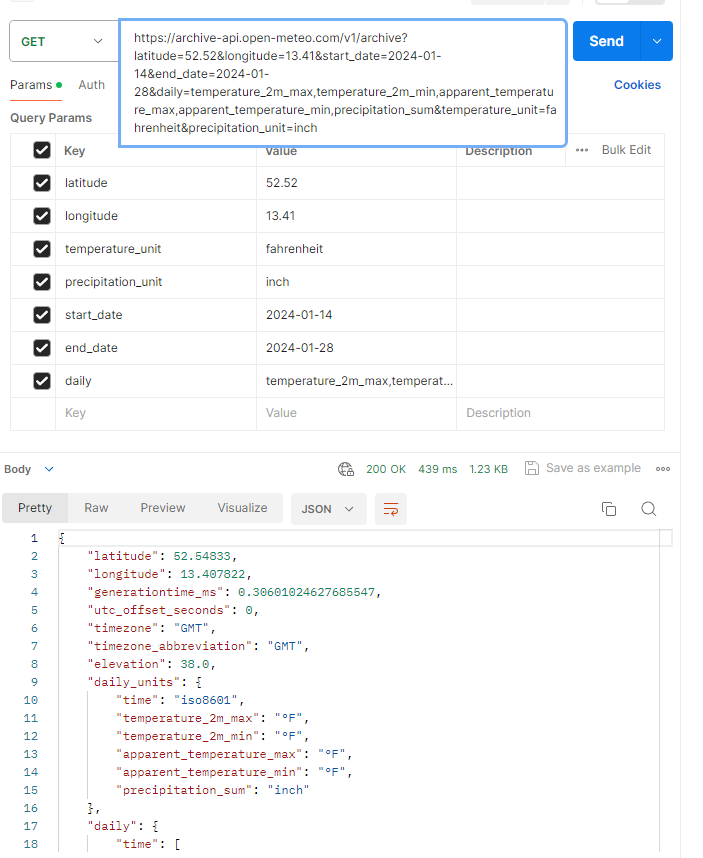

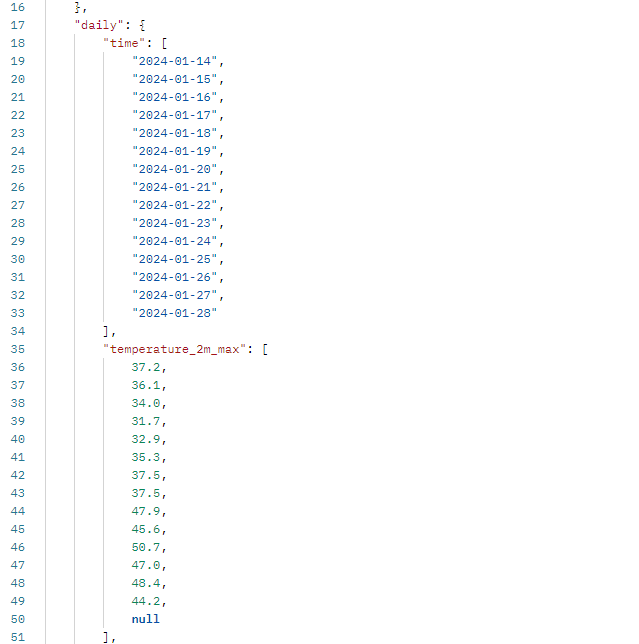

In [4]:
# helper function for 15-day date range
def get_date_range(birthday):
    return {'start_date': birthday - timedelta(days=7),
            'end_date': birthday + timedelta(days=7)
           }

In [46]:
def get_date_range(birthday):
    date_format = "%Y-%m-%d"
    input_date = datetime.strptime(birthday, date_format)
    start_date = (input_date - timedelta(days=7)).strftime(date_format)
    end_date = (input_date + timedelta(days=7)).strftime(date_format)
    return start_date, end_date

In [47]:
# write your solution here
def get_api_response(latitude, longitude, date):
    url = "https://archive-api.open-meteo.com/v1/archive"
    
    start_date, end_date = get_date_range(date)
    
    params = {
        'latitude': latitude,
        'longitude': longitude,
        'start_date': start_date,
        'end_date': end_date,
        'daily': 'temperature_2m_max,temperature_2m_min,apparent_temperature_max,apparent_temperature_min,precipitation_sum',
        'temperature_unit': 'fahrenheit',
        'precipitation_unit': 'inch'
    }
    
    
    response = requests.get(url, params=params)
    return response.json()

### Iterating Over Each Year
Write a function that iterates through each year between 1960 and 2022 and returns the corresponding JSON response objects containing weather data for each year in a python list.

```
def get_all_response_objects(start_year, end_year):
    # your code
```


In [8]:
# write your solution here
def get_all_response_objects(start_year, end_year):
    response_objects = []
    
    for year in range(start_year, end_year + 1):
        current_date = f"{year}-{date[5:]}"
        api_response = get_api_response(latitude, longitude, current_date)
        
        if api_response:
            response_objects.append(api_response)

    return response_objects


### Parse JSON Responses & Aggregate Data
Write a function that takes the list of JSON response objects from the previous function in as a parameter and returns a pandas DataFrame containing the original input date, the measurements, and the average across the 15 days.
```
def parse_json_response(responses):
    # your code
```


In [9]:
# write your solution here
def parse_json_response(responses):
    data = []

    for response in responses:
        original_date = response['meta']['timestamp']
        measurements = response['daily']

        averages = {}
        for measurement in measurements:
            for key, value in measurement.items():
                if key not in averages:
                    averages[key] = value
                else:
                    averages[key] += value

        # Calculate average values for each measurement
        for key in averages:
            averages[key] /= len(measurements)

        data.append({
            'Original Date': original_date,
            **averages
        })

    df = pd.DataFrame(data)
    return df

### Combining the Functions
Write a function that combines all the above functions into one, where the user inputs their birthday and location and the function returns the pandas DataFrame containing the summary of measurements.

```
def get_data():
    birthday = get_user_birthday()
    location = get_user_city_of_birth()
    # your code here
```

The helper functions below can be used for birthday and location input information:

In [40]:
# helper functions
def get_user_birthday():
    birthday = input('Enter your birthday (MM/DD/YYYY): ')
    return datetime.strptime(birthday, "%m/%d/%Y")

def get_user_city_of_birth():
    city = input('Enter the city you were born in: ')
    country = input('Enter the country you were born in: ')
    return city , country

In [41]:
# write your solution here
def get_data():
    birthday = get_user_birthday()
    city, country = get_user_city_of_birth()
    
    
    get_date_range(birthday)
    geocode_location(city, country)
    
    get_api_response(latitude, longitude, date)
    get_all_response_objects(start_year, end_year, latitude, longitude, date)
    
    parse_json_response(responses)

Run your function and set it equal to `df`:

In [48]:
get_data()
df = get_data()

df.head()

Enter your birthday (MM/DD/YYYY): 06/04/1991
Enter the city you were born in: detroit
Enter the country you were born in: michigan


TypeError: strptime() argument 1 must be str, not datetime.datetime

## Question 3: Visualizing The Data
Plot the DataFrame using `matplotlib`/`seaborn` and write a short summary of your results.

In [ ]:
# enter your code here

### Results Summary: